In [1]:
# %conda install -c conda-forge pandas-profiling

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta
from math import log10
%matplotlib inline
start_time = datetime.now()

In [2]:
data = pd.read_csv('card transactions.csv', converters={'Merchnum': lambda x: str(x)})

In [3]:
data.shape

(96753, 10)

In [4]:
data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Recnum             96753 non-null  int64  
 1   Cardnum            96753 non-null  int64  
 2   Date               96753 non-null  object 
 3   Merchnum           96753 non-null  object 
 4   Merch description  96753 non-null  object 
 5   Merch state        95558 non-null  object 
 6   Merch zip          92097 non-null  float64
 7   Transtype          96753 non-null  object 
 8   Amount             96753 non-null  float64
 9   Fraud              96753 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 7.4+ MB


In [6]:
data.dropna(how='all', axis=1, inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
# data['Date'] = data['Date'] + pd.offsets.DateOffset(years=-4)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96753 entries, 0 to 96752
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Recnum             96753 non-null  int64         
 1   Cardnum            96753 non-null  int64         
 2   Date               96753 non-null  datetime64[ns]
 3   Merchnum           96753 non-null  object        
 4   Merch description  96753 non-null  object        
 5   Merch state        95558 non-null  object        
 6   Merch zip          92097 non-null  float64       
 7   Transtype          96753 non-null  object        
 8   Amount             96753 non-null  float64       
 9   Fraud              96753 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 7.4+ MB


In [7]:
data.head(10)

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0
5,6,5142149874,2006-01-01,5509006296254,FEDEX SHP 12/22/09 AB#,TN,38118.0,P,3.67,0
6,7,5142189277,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0
7,8,5142191182,2006-01-01,6098208200062,MIAMI COMPUTER SUPPLY,OH,45429.0,P,230.32,0
8,9,5142258629,2006-01-01,602608969534,FISHER SCI ATL,GA,30091.0,P,62.11,0
9,10,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0


In [8]:
data.to_csv('card transactions 2006.csv', index=False)

In [51]:
data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud', 'DOW'],
      dtype='object')

In [9]:
data.describe(include = 'all')

/var/folders/7g/bglwz2w12hn59p4bnxmgjcs00000gn/T/ipykernel_1094/4280773600.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include = 'all')


,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
count,96753.000000,9.675300e+04,96753,96753,96753,95558,92097.000000,96753,9.675300e+04,96753.000000
unique,NaN,NaN,365,13092,13126,227,NaN,4,NaN,NaN
top,NaN,NaN,2006-02-28 00:00:00,930090121224,GSA-FSS-ADV,TN,NaN,P,NaN,NaN
freq,NaN,NaN,684,9310,1688,12035,NaN,96398,NaN,NaN
first,NaN,NaN,2006-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2006-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,48377.000000,5.142202e+09,NaN,NaN,NaN,NaN,44706.596740,NaN,4.278857e+02,0.010945
std,27930.329635,5.567084e+04,NaN,NaN,NaN,NaN,28369.537945,NaN,1.000614e+04,0.104047
min,1.000000,5.142110e+09,NaN,NaN,NaN,NaN,1.000000,NaN,1.000000e-02,0.000000
25%,24189.000000,5.142152e+09,NaN,NaN,NaN,NaN,20855.000000,NaN,3.348000e+01,0.000000


In [76]:
data['Amount'].mean

<bound method NDFrame._add_numeric_operations.<locals>.mean of 0           3.62
1          31.42
2         178.49
3           3.62
4           3.62
          ...   
96748      84.79
96749     118.75
96750     363.56
96751    2202.03
96752     554.64
Name: Amount, Length: 96753, dtype: float64>

In [54]:
data.count() * 100 / len(data)

Recnum               100.000000
Cardnum              100.000000
Date                 100.000000
Merchnum             100.000000
Merch description    100.000000
Merch state           98.764896
Merch zip             95.187746
Transtype            100.000000
Amount               100.000000
Fraud                100.000000
DOW                  100.000000
dtype: float64

In [55]:
data.count()

Recnum               96753
Cardnum              96753
Date                 96753
Merchnum             96753
Merch description    96753
Merch state          95558
Merch zip            92097
Transtype            96753
Amount               96753
Fraud                96753
DOW                  96753
dtype: int64

In [11]:
len(data['Recnum'].unique())

96753

In [79]:
data['Recnum'].value_counts()

1        1
64500    1
64509    1
64508    1
64507    1
        ..
32250    1
32249    1
32248    1
32247    1
96753    1
Name: Recnum, Length: 96753, dtype: int64

In [12]:
len(data['Cardnum'].unique())

1645

In [88]:
data['Cardnum'].value_counts()#.idxmax()

5142148452    1192
5142184598     921
5142189108     663
5142297710     583
5142223373     579
              ... 
5142306704       1
5142135021       1
5142276358       1
5142142008       1
5142233066       1
Name: Cardnum, Length: 1645, dtype: int64

In [60]:
len(data['Date'].unique())

365

In [89]:
data['Date'].value_counts()#.idxmax()

2006-02-28    684
2006-08-10    610
2006-03-15    594
2006-09-13    564
2006-09-07    536
             ... 
2006-11-07     11
2006-10-03     10
2006-01-16      9
2006-10-17      6
2006-12-26      6
Name: Date, Length: 365, dtype: int64

In [62]:
len(data['Merchnum'].unique())

13092

In [63]:
data['Merchnum'].value_counts().idxmax()

'930090121224'

In [64]:
len(data['Merch description'].unique())

13126

In [65]:
data['Merch description'].value_counts().idxmax()

'GSA-FSS-ADV'

In [66]:
len(data['Merch state'].unique())

228

In [67]:
data['Merch state'].value_counts().idxmax()

'TN'

In [68]:
len(data['Merch zip'].unique())

4568

In [69]:
data['Merch zip'].value_counts().idxmax()

38118.0

In [78]:
len(data['Fraud'].unique())

2

In [71]:
data['Transtype'].value_counts().idxmax()

'P'

In [77]:
data['Fraud'].value_counts().idxmax()

0

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '5142148452'),
  Text(1, 0, '5142184598'),
  Text(2, 0, '5142189108'),
  Text(3, 0, '5142297710'),
  Text(4, 0, '5142223373'),
  Text(5, 0, '5142187452'),
  Text(6, 0, '5142299634'),
  Text(7, 0, '5142189945'),
  Text(8, 0, '5142149691'),
  Text(9, 0, '5142190147'),
  Text(10, 0, '5142230181'),
  Text(11, 0, '5142157720'),
  Text(12, 0, '5142152067'),
  Text(13, 0, '5142143744'),
  Text(14, 0, '5142125684')])

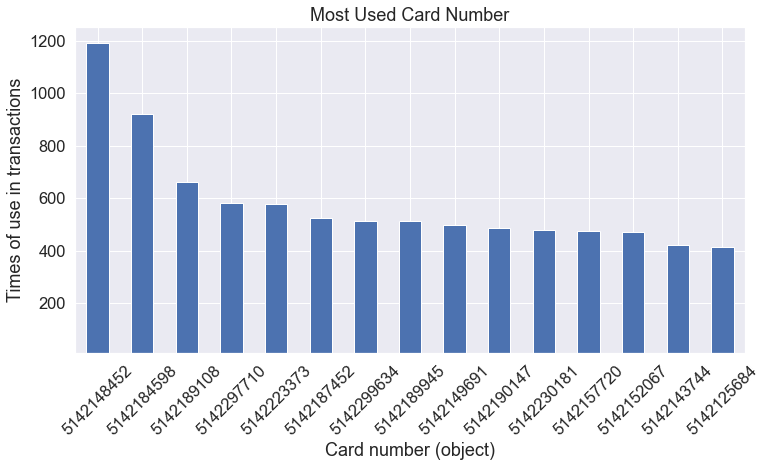

In [87]:
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)
data['Cardnum'].value_counts().head(15).plot(kind = 'bar')
#plt.yscale('log')
plt.ylim(bottom = 10)
plt.title('Most Used Card Number')
plt.xlabel("Card number (object)")
plt.ylabel("Times of use in transactions")
plt.xticks(rotation = 45)

In [14]:
len(data['Date'].unique())

365

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2006-02-28 00:00:00'),
  Text(1, 0, '2006-08-10 00:00:00'),
  Text(2, 0, '2006-03-15 00:00:00'),
  Text(3, 0, '2006-09-13 00:00:00'),
  Text(4, 0, '2006-09-07 00:00:00'),
  Text(5, 0, '2006-08-09 00:00:00'),
  Text(6, 0, '2006-09-14 00:00:00'),
  Text(7, 0, '2006-09-21 00:00:00'),
  Text(8, 0, '2006-08-01 00:00:00'),
  Text(9, 0, '2006-08-31 00:00:00'),
  Text(10, 0, '2006-09-28 00:00:00'),
  Text(11, 0, '2006-08-29 00:00:00'),
  Text(12, 0, '2006-02-16 00:00:00'),
  Text(13, 0, '2006-09-19 00:00:00'),
  Text(14, 0, '2006-02-09 00:00:00')])

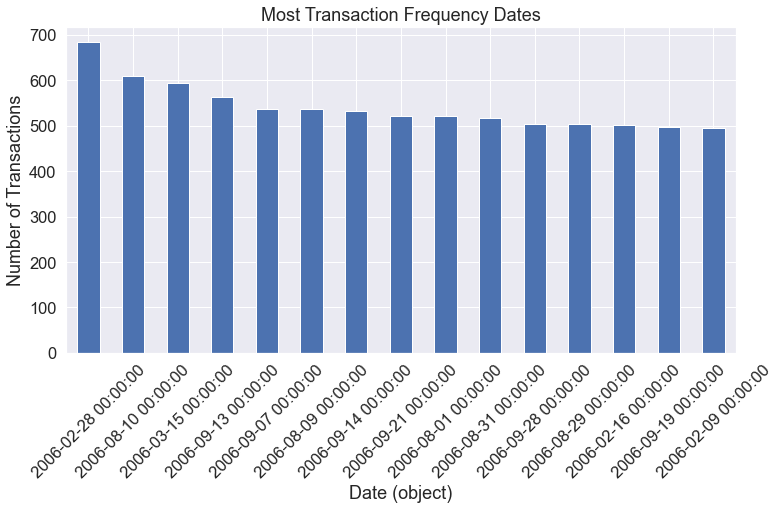

In [90]:
data['Date'].value_counts().head(15).plot(kind = 'bar')
plt.title('Most Transaction Frequency Dates')
plt.xlabel("Date (object)")
plt.ylabel("Number of Transactions")
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '2006-03-19 00:00:00'),
  Text(1, 0, '2006-11-14 00:00:00'),
  Text(2, 0, '2006-11-21 00:00:00'),
  Text(3, 0, '2006-10-10 00:00:00'),
  Text(4, 0, '2006-10-24 00:00:00'),
  Text(5, 0, '2006-03-26 00:00:00'),
  Text(6, 0, '2006-12-25 00:00:00'),
  Text(7, 0, '2006-01-30 00:00:00'),
  Text(8, 0, '2006-02-27 00:00:00'),
  Text(9, 0, '2006-02-20 00:00:00'),
  Text(10, 0, '2006-11-07 00:00:00'),
  Text(11, 0, '2006-10-03 00:00:00'),
  Text(12, 0, '2006-01-16 00:00:00'),
  Text(13, 0, '2006-10-17 00:00:00'),
  Text(14, 0, '2006-12-26 00:00:00')])

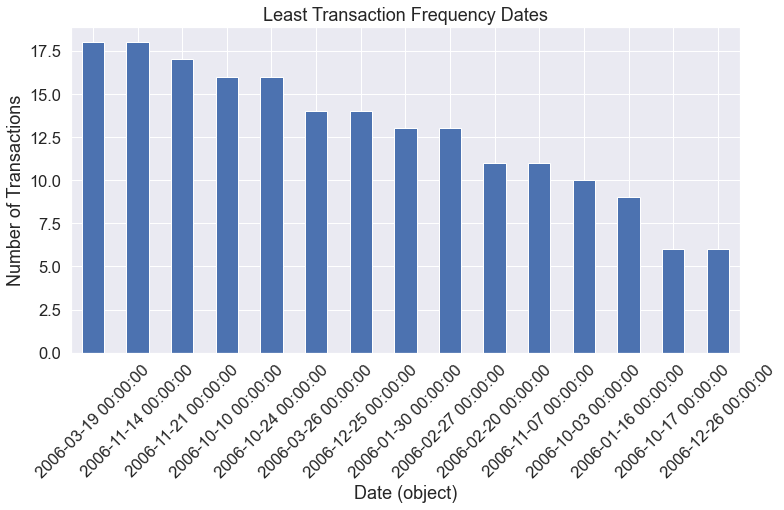

In [91]:
data['Date'].value_counts().tail(15).plot(kind='bar')
plt.title('Least Transaction Frequency Dates')
plt.xlabel("Date (object)")
plt.ylabel("Number of Transactions")
plt.xticks(rotation = 45)

In [17]:
count_day = data.groupby('Date').count()
count_day.head(20)

,Recnum,Cardnum,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud
Date,,,,,,,,,
2006-01-01,51,51,51,51,51,51,51,51,51
2006-01-02,29,29,29,29,29,10,29,29,29
2006-01-03,159,159,159,159,157,153,159,159,159
2006-01-04,229,229,229,229,226,221,229,229,229
2006-01-05,309,309,309,309,299,297,309,309,309
2006-01-06,330,330,330,330,328,321,330,330,330
2006-01-07,307,307,307,307,305,294,307,307,307
2006-01-08,104,104,104,104,104,104,104,104,104
2006-01-09,19,19,19,19,19,19,19,19,19


Text(0, 0.5, 'Transaction Volumn')

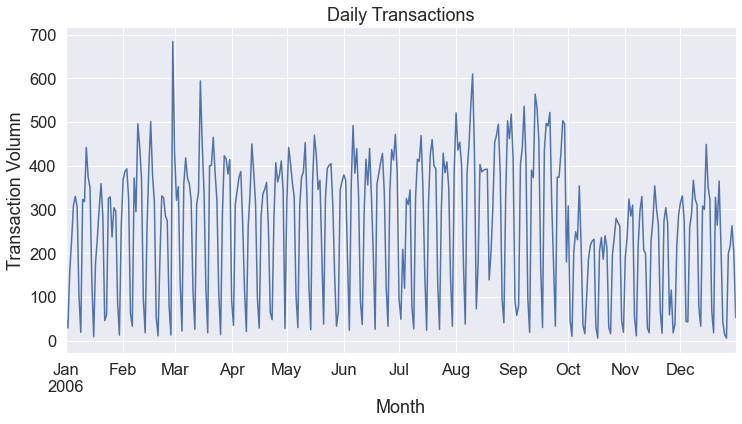

In [95]:
data.assign(trx = np.ones(len(data))).set_index(data['Date']).resample(timedelta(days = 1))\
    .count().trx.plot(title = 'Daily Transactions')
plt.xlabel("Month")
plt.ylabel("Transaction Volumn")

Text(0, 0.5, 'Transaction Volumn')

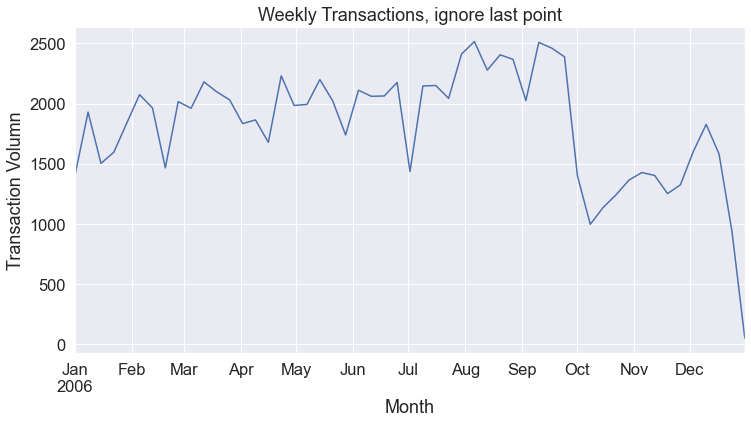

In [96]:
data.assign(trx = np.ones(len(data))).set_index(data['Date']).resample(timedelta(days = 7))\
    .count().trx.plot(title = 'Weekly Transactions, ignore last point')
plt.xlabel("Month")
plt.ylabel("Transaction Volumn")
# How do I not plot this last point, which is artificially set at zero?

Text(0, 0.5, 'Transaction Volumn')

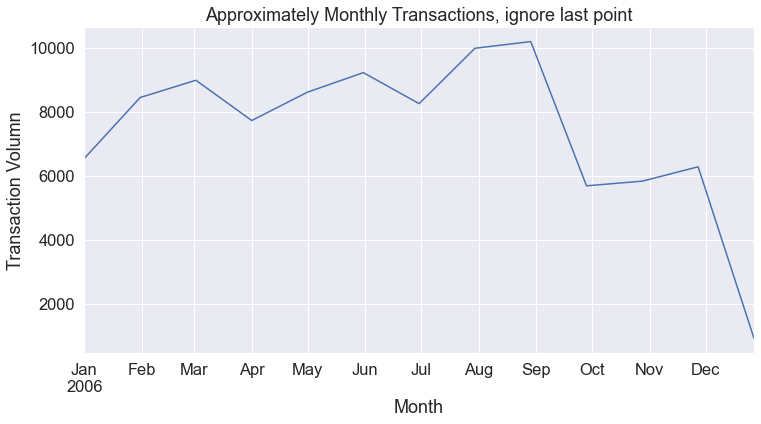

In [97]:
data.assign(trx = np.ones(len(data))).set_index(data['Date']).resample(timedelta(days = 30))\
    .count().trx.plot(title = 'Approximately Monthly Transactions, ignore last point')
plt.xlabel("Month")
plt.ylabel("Transaction Volumn")

In [21]:
len(data['Merchnum'].unique())

13092

In [22]:
data['Merchnum'].value_counts().head(10)

930090121224     9310
                 3375
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
410000971343      982
9918000409955     956
5725000466504     872
9108234610000     817
Name: Merchnum, dtype: int64

In [109]:
data[data['Merchnum'] != '']['Merchnum'].value_counts()

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
                 ... 
2000021670061       1
6731000199309       1
9813800006594       1
3065107420906       1
3500000006160       1
Name: Merchnum, Length: 13091, dtype: int64

Text(0, 0.5, 'Number of Transactions')

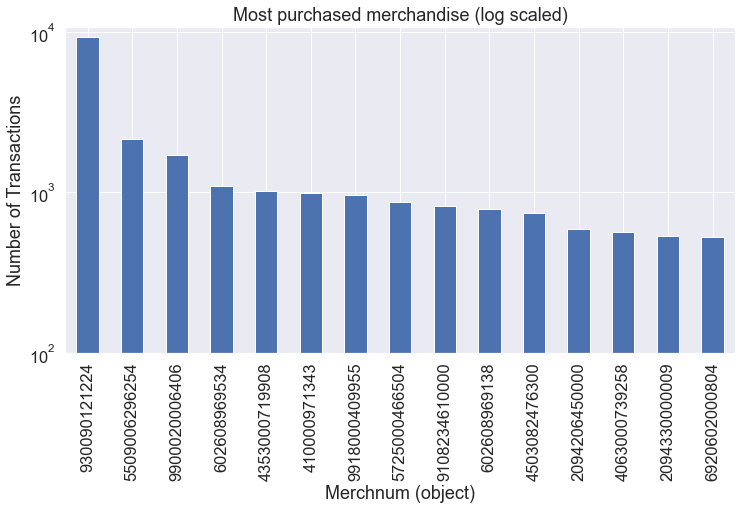

In [115]:
data[data['Merchnum'] != '']['Merchnum'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.ylim(bottom = 100)
plt.title('Most purchased merchandise (log scaled)')
plt.xlabel("Merchnum (object)")
plt.ylabel("Number of Transactions")
#plt.xticks(rotation = 80)

In [24]:
len(data['Merch description'].unique())

13126

In [25]:
data['Merch description'].value_counts()

GSA-FSS-ADV                 1688
SIGMA-ALDRICH               1635
STAPLES #941                1174
FISHER SCI ATL              1093
MWI*MICRO WAREHOUSE          958
                            ... 
HBD INC                        1
SALES MARKETING MAGAZINE       1
PATTERSON'S TRUE VALUE         1
FLOPPY COPY                    1
BEST BUY      00001610         1
Name: Merch description, Length: 13126, dtype: int64

Text(0, 0.5, 'Number of Appearence')

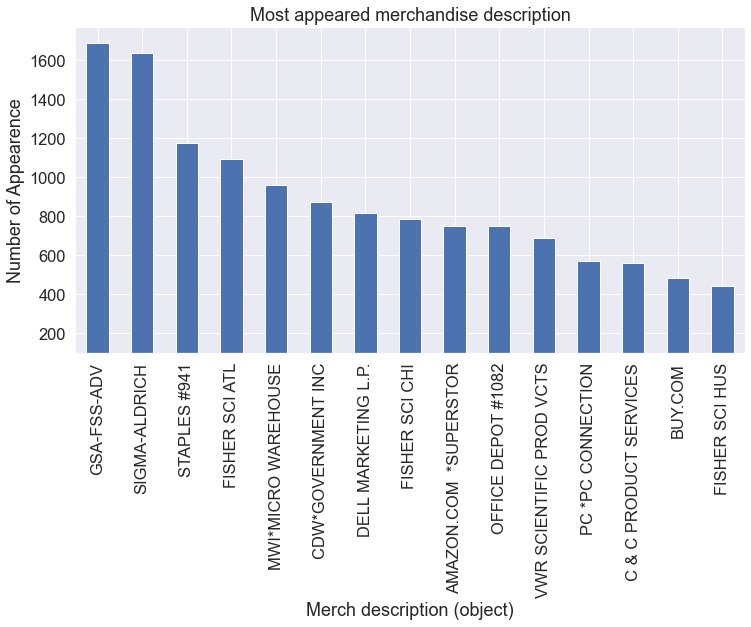

In [118]:
data[data['Merch description'] != '']['Merch description'].value_counts().head(15).plot(kind = 'bar')
#plt.yscale('log')
plt.ylim(bottom = 100)
plt.title('Most appeared merchandise description')
plt.xlabel("Merch description (object)")
plt.ylabel("Number of Appearence")

Text(0, 0.5, 'Number of Appearence')

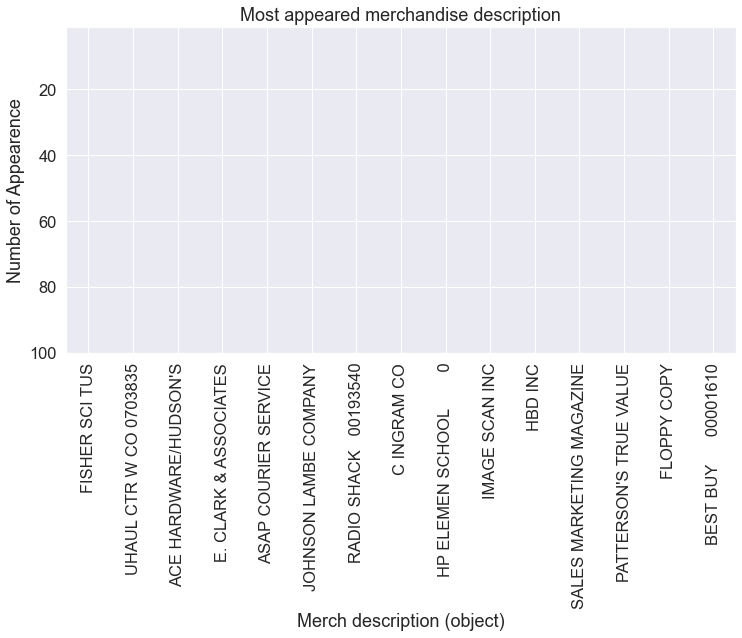

In [119]:
data[data['Merch description'] != '']['Merch description'].value_counts().tail(15).plot(kind = 'bar')
#plt.yscale('log')
plt.ylim(bottom = 100)
plt.title('Most appeared merchandise description')
plt.xlabel("Merch description (object)")
plt.ylabel("Number of Appearence")

In [26]:
len(data['Merch state'].unique())

228

In [27]:
data['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
495        1
376        1
458        1
546        1
116        1
Name: Merch state, Length: 227, dtype: int64

Text(0, 0.5, 'Number of Appearence')

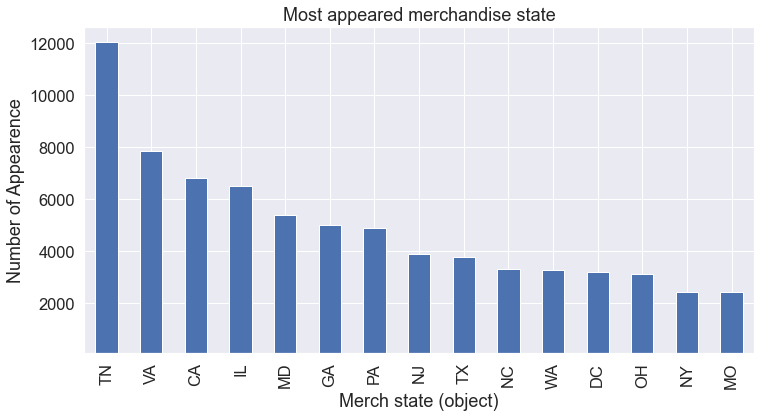

In [120]:
data[data['Merch state'] != '']['Merch state'].value_counts().head(15).plot(kind = 'bar')
#plt.yscale('log')
plt.ylim(bottom = 100)
plt.title('Most appeared merchandise state')
plt.xlabel("Merch state (object)")
plt.ylabel("Number of Appearence")

In [28]:
len(data['Merch zip'].unique())

4568

In [29]:
data['Merch zip'].value_counts()

38118.0    11868
63103.0     1650
8701.0      1267
22202.0     1250
60061.0     1221
           ...  
89125.0        1
46225.0        1
27025.0        1
6076.0         1
36043.0        1
Name: Merch zip, Length: 4567, dtype: int64

Text(0, 0.5, 'Number of Appearence')

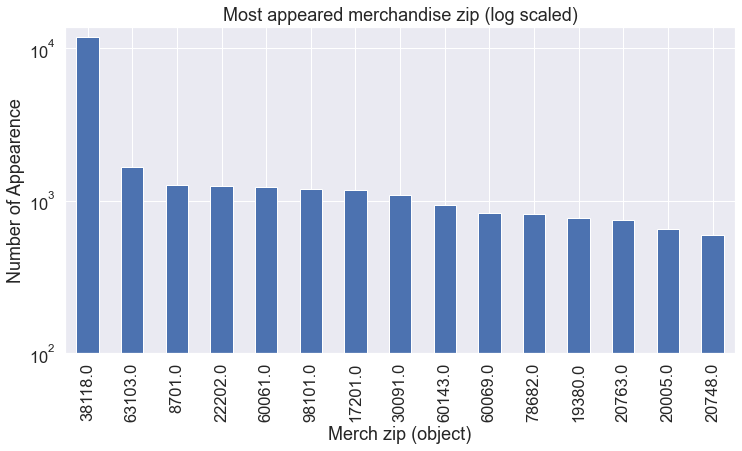

In [124]:
data[data['Merch zip'] != '']['Merch zip'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.ylim(bottom = 100)
plt.title('Most appeared merchandise zip (log scaled)')
plt.xlabel("Merch zip (object)")
plt.ylabel("Number of Appearence")

In [30]:
data['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

Text(0, 0.5, 'Number of Appearence')

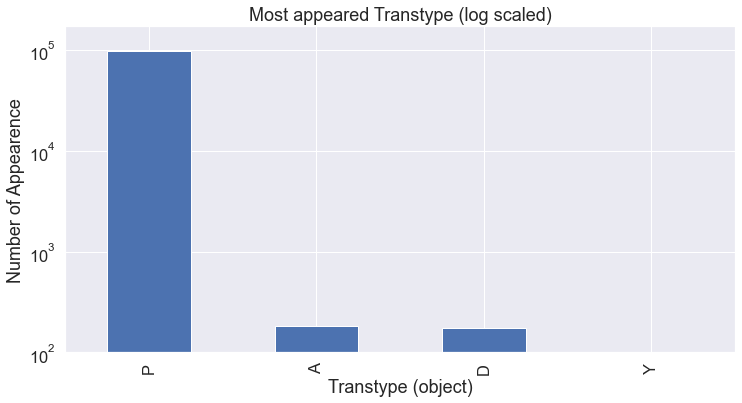

In [125]:
data[data['Transtype'] != '']['Transtype'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.ylim(bottom = 100)
plt.title('Most appeared Transtype (log scaled)')
plt.xlabel("Transtype (object)")
plt.ylabel("Number of Appearence")

In [31]:
data['Amount'].value_counts()

3.62       4283
3.67       1620
3.74        913
3.80        827
4.37        378
           ... 
949.29        1
2303.00       1
303.72        1
183.36        1
554.64        1
Name: Amount, Length: 34909, dtype: int64

Text(0, 0.5, 'Number of Appearence')

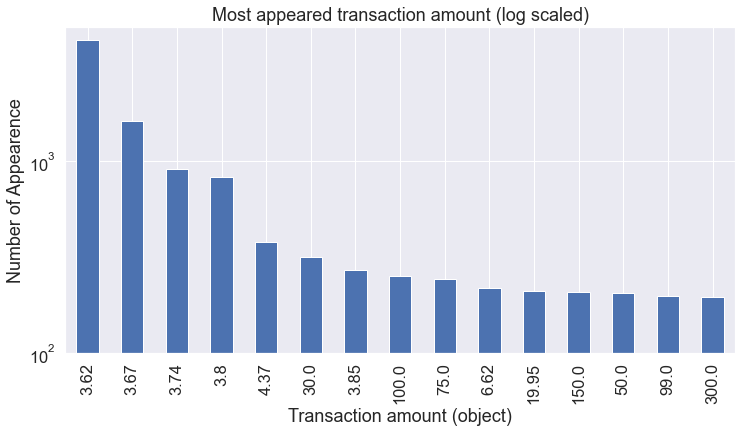

In [127]:
data['Amount'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.ylim(bottom = 100)
plt.title('Most appeared transaction amount (log scaled)')
plt.xlabel("Transaction amount (object)")
plt.ylabel("Number of Appearence")

(0.1, 171768.2728626341)

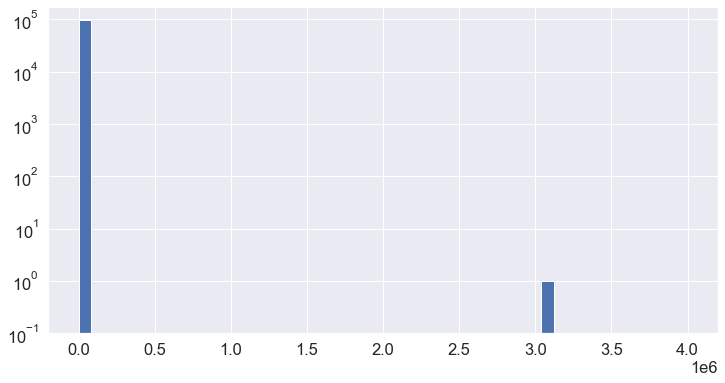

In [128]:
plt.hist(data['Amount'],bins=50,range=[0,4000000])
plt.yscale('log')
plt.ylim(bottom = .1)

Text(67.9376109375, 0.5, 'Number of Appearence')

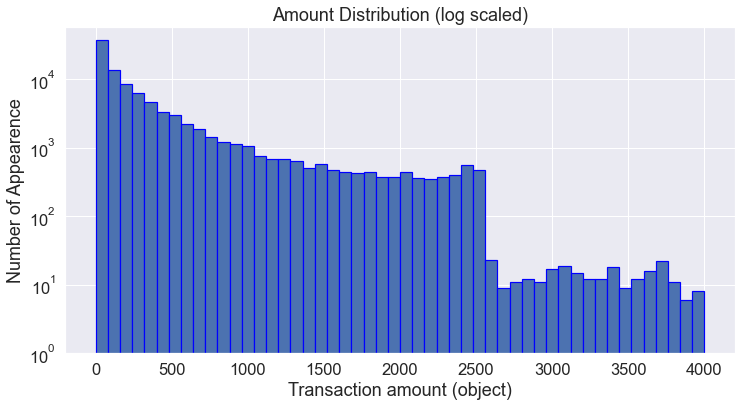

In [129]:
plt.hist(data['Amount'],bins=50,range=[0,4000],edgecolor='blue',linewidth=1.2)
plt.yscale('log')
plt.ylim(bottom = 1)
plt.savefig('amount distribution')
plt.title('Amount Distribution (log scaled)')
plt.xlabel("Transaction amount (object)")
plt.ylabel("Number of Appearence")

Text(0.5, 1.0, 'Fraud Cases')

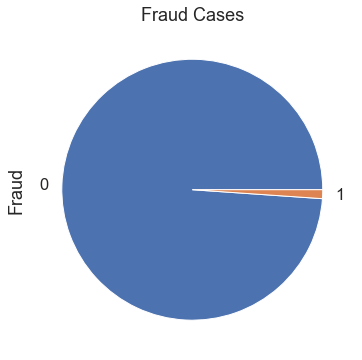

In [138]:
data['Fraud'].value_counts().plot(kind='pie')
#plt.yscale('log')
plt.title('Fraud Cases Percentages')

## OK, that's what the raw data looks like. Now let's remove the exclusions and explore the data a bit more

In [36]:
data['DOW'] = data['Date'].dt.day_name()

In [37]:
# remove exclusions: only keep the type P's and remove one high transaction outlier
temp = data[data['Transtype'] == 'P']
trans = temp[temp['Amount'] <= 1000000]
trans = trans.reset_index(drop=True)
trans.shape

(96397, 11)

In [38]:
trans.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,DOW
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Sunday
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Sunday
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,Sunday
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Sunday
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Sunday


<AxesSubplot:>

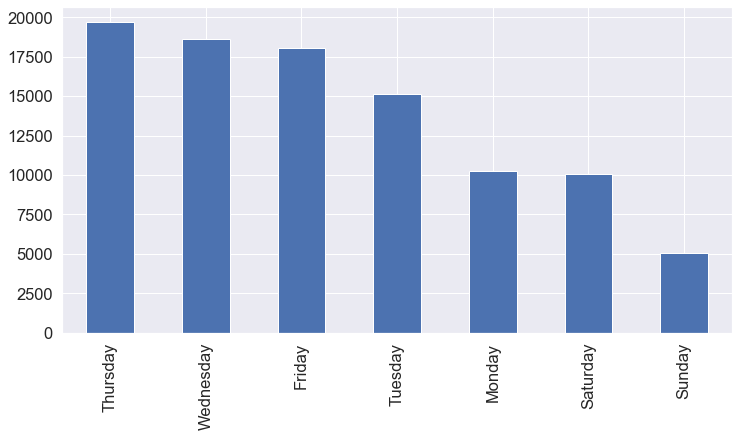

In [39]:
data['DOW'].value_counts().plot(kind = 'bar')

In [40]:
goods = trans[trans['Fraud'] == 0]
bads = trans[trans['Fraud'] == 1]
print("#goods:", len(goods), "    #bads:", len(bads))

#goods: 95338     #bads: 1059


In [41]:
goods.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,DOW
0,1,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Sunday
1,2,5142183973,2006-01-01,61003026333,SERVICE MERCHANDISE #81,MA,1803.0,P,31.42,0,Sunday
2,3,5142131721,2006-01-01,4503082993600,OFFICE DEPOT #191,MD,20706.0,P,178.49,0,Sunday
3,4,5142148452,2006-01-01,5509006296254,FEDEX SHP 12/28/09 AB#,TN,38118.0,P,3.62,0,Sunday
4,5,5142190439,2006-01-01,5509006296254,FEDEX SHP 12/23/09 AB#,TN,38118.0,P,3.62,0,Sunday


In [42]:
overall_fraud_rate = len(bads) / len(trans)
print(overall_fraud_rate)

0.010985819060759152


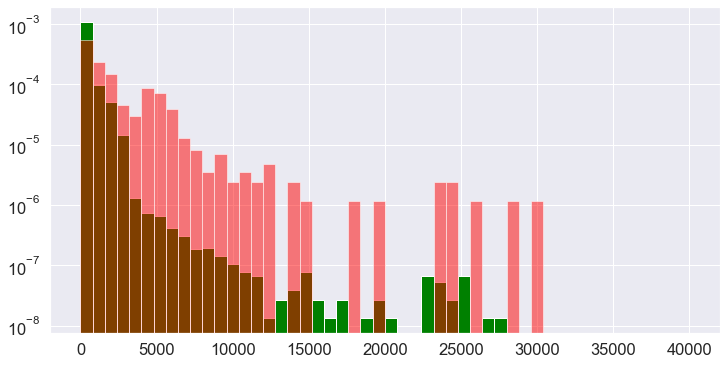

In [43]:
plt.hist(goods['Amount'],bins=50,range=[0,40000], density = True, color = 'green')
plt.hist(bads['Amount'],bins=50,range=[0,40000], density = True, color = 'red', alpha = .5)
plt.yscale('log')

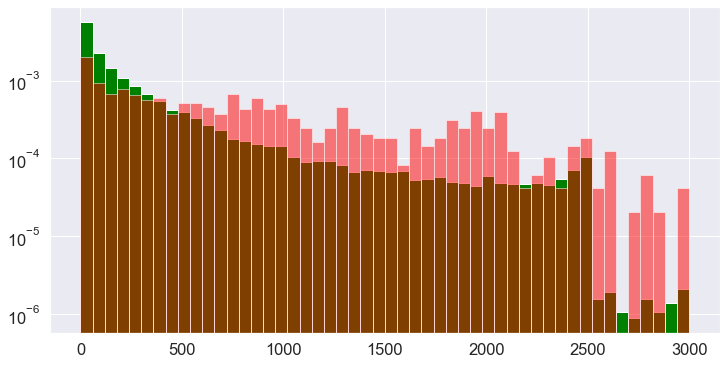

In [44]:
plt.hist(goods['Amount'],bins=50,range=[0,3000], density = True, color = 'green')
plt.hist(bads['Amount'],bins=50,range=[0,3000], density = True, color = 'red', alpha = .5)
plt.yscale('log')

<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date'>

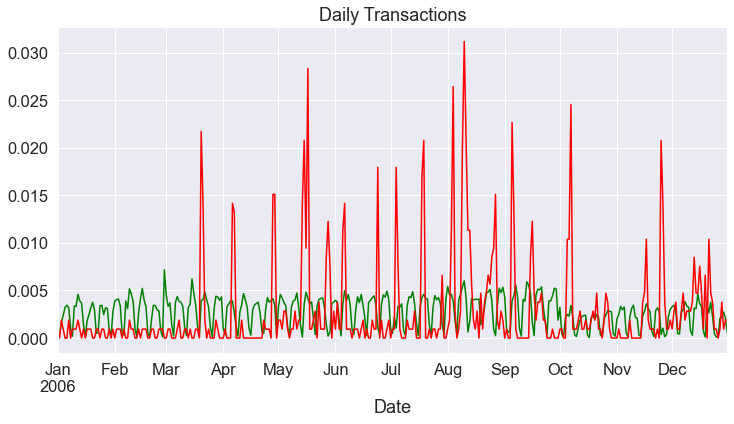

In [45]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(timedelta(days = 1)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(timedelta(days = 1)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<AxesSubplot:title={'center':'Weeky Transactions'}, xlabel='Date'>

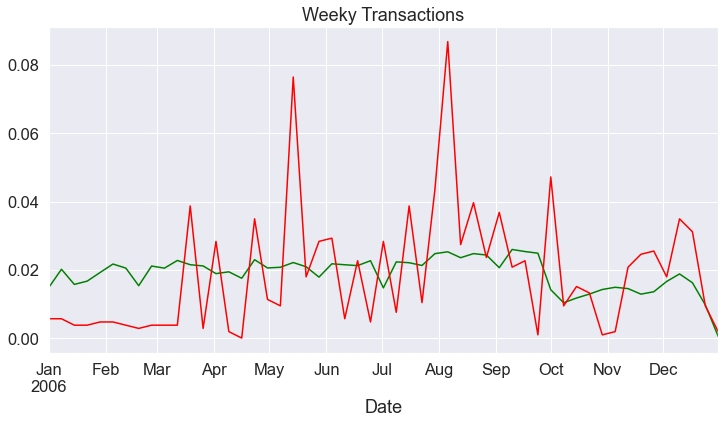

In [46]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(timedelta(days = 7)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weeky Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(timedelta(days = 7)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<AxesSubplot:title={'center':'Approximately Monthly Transactions'}, xlabel='Date'>

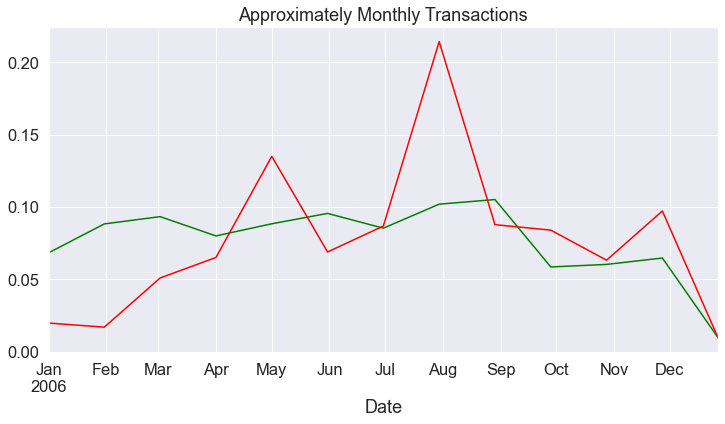

In [47]:
goods_series = goods.assign(trx = np.ones(ngoods)).set_index(goods['Date']).resample(timedelta(days = 30)).count().trx
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Approximately Monthly Transactions', color = 'green')
bads_series = bads.assign(trx = np.ones(nbads)).set_index(bads['Date']).resample(timedelta(days = 30)).count().trx
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [48]:
# import pandas_profiling
# profile = pandas_profiling.ProfileReport(mydata)
# profile.to_file('Data Summary.html')

In [49]:
stop_time = datetime.now()
print('duration: ', stop_time - start_time)

duration:  0:00:47.085457
